# Percentile Analysis

In [68]:
import sys

import numpy as np
from matplotlib import pylab as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

sys.path.append("..")
from constants import MIN_DAYSAHEAD, MAX_DAYSAHEAD, BIN_FREQ_PER_DAY

sns.set()

# Load Data Frames from Disk

In [69]:
df = pd.DataFrame()
df_baseline = pd.DataFrame()

for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1):
    # Load model dataframe
    df_cur = pd.read_csv(
        f"../data/processed/skew_gaussian/k200/delta_window8/percentiles_daysahead{i}_R000.csv"
    )
    df["TruePercentile"] = df_cur["TruePercentile"]
    df[f"{i} Days"] = df_cur["ObservedPercentile"]

    # Load baseline dataframe
    df_cur = pd.read_csv(
        f"../data/processed/baseline/percentiles_daysahead{i}_R000.csv"
    )
    df_baseline["TruePercentile"] = df_cur["TruePercentile"]
    df_baseline[f"{i} Days"] = df_cur["ObservedPercentile"]

In [70]:
df

,TruePercentile,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,5.4,4.9,4.9,5.1,5.1,5.2,4.8
2,10,10.4,10.0,9.7,9.9,10.2,10.3,9.8
3,15,15.5,15.0,14.6,14.9,15.3,15.6,15.0
4,20,20.5,20.1,19.6,19.5,20.7,20.8,20.2
5,25,25.6,25.0,24.7,24.6,25.6,25.7,25.1
6,30,30.6,29.4,29.3,29.6,30.6,30.8,29.9
7,35,35.4,34.6,33.9,34.5,35.4,35.8,34.7
8,40,40.3,39.5,38.6,39.6,40.2,40.7,39.5
9,45,45.5,44.3,43.7,44.3,45.3,45.5,43.9


In [71]:
df_baseline

,TruePercentile,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,6.4,6.4,6.4,6.1,6.5,6.5,6.6
2,10,12.4,12.6,12.4,12.8,12.9,12.7,13.4
3,15,18.2,18.6,18.9,19.0,19.1,19.1,19.4
4,20,23.9,24.5,24.3,24.9,25.3,25.2,25.8
5,25,30.2,30.2,30.5,31.1,31.6,31.3,31.8
6,30,35.6,36.1,36.2,36.7,37.5,37.0,37.9
7,35,41.1,41.4,42.1,42.3,42.8,42.4,43.5
8,40,46.3,46.6,47.7,47.5,48.5,48.0,48.6
9,45,51.0,51.4,52.7,52.5,53.4,53.0,53.5


# Model Results

In [72]:
pd.set_option("display.float_format", "{:.1f}".format)
df[df.TruePercentile.apply(lambda x: x in [25, 50, 75])]

,TruePercentile,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
5,25,25.6,25.0,24.7,24.6,25.6,25.7,25.1
10,50,50.1,49.2,48.4,49.1,50.2,50.5,48.6
15,75,74.0,73.7,72.5,73.3,73.4,73.6,70.6


In [73]:
df_err = pd.DataFrame(
    {
        f"{i} Days": df["TruePercentile"] - df[f"{i} Days"]
        for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1)
    }
)
df_err

,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.4,0.1,0.1,-0.1,-0.1,-0.2,0.2
2,-0.4,0.0,0.3,0.1,-0.2,-0.3,0.2
3,-0.5,0.0,0.4,0.1,-0.3,-0.6,0.0
4,-0.5,-0.1,0.4,0.5,-0.7,-0.8,-0.2
5,-0.6,0.0,0.3,0.4,-0.6,-0.7,-0.1
6,-0.6,0.6,0.7,0.4,-0.6,-0.8,0.1
7,-0.4,0.4,1.1,0.5,-0.4,-0.8,0.3
8,-0.3,0.5,1.4,0.4,-0.2,-0.7,0.5
9,-0.5,0.7,1.3,0.7,-0.3,-0.5,1.1


# Baseline Results

In [74]:
df_baseline[df_baseline.TruePercentile.apply(lambda x: x in [25, 50, 75])]

,TruePercentile,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
5,25,30.2,30.2,30.5,31.1,31.6,31.3,31.8
10,50,55.7,56.1,57.2,57.1,58.3,57.5,58.0
15,75,77.2,77.9,78.0,77.9,78.2,78.3,77.2


In [75]:
df_baseline_err = pd.DataFrame(
    {
        f"{i} Days": df_baseline["TruePercentile"] - df_baseline[f"{i} Days"]
        for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1)
    }
)

In [76]:
df_baseline_err

,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.4,-1.4,-1.4,-1.1,-1.5,-1.5,-1.6
2,-2.4,-2.6,-2.4,-2.8,-2.9,-2.7,-3.4
3,-3.2,-3.6,-3.9,-4.0,-4.1,-4.1,-4.4
4,-3.9,-4.5,-4.3,-4.9,-5.3,-5.2,-5.8
5,-5.2,-5.2,-5.5,-6.1,-6.6,-6.3,-6.8
6,-5.6,-6.1,-6.2,-6.7,-7.5,-7.0,-7.9
7,-6.1,-6.4,-7.1,-7.3,-7.8,-7.4,-8.5
8,-6.3,-6.6,-7.7,-7.5,-8.5,-8.0,-8.6
9,-6.0,-6.4,-7.7,-7.5,-8.4,-8.0,-8.5


# Comparison Plot 

In [77]:
def make_plot(df_plot, title, ax):
    for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1):
        ax.plot(df_plot.TruePercentile, df_plot[f"{i} Days"], "o-", label=f"{i} Days")
    ax.plot(
        df_plot.TruePercentile,
        df_plot.TruePercentile,
        color="red",
        label="Identity",
        linestyle="dashed",
    )
    ax.legend().set_title("Days Ahead")
    ax.set_xlabel("True Percentile")
    ax.set_ylabel("Observed Percentile")
    ax.set_xlim(0, 101)
    ax.set_ylim(0, 101)
    ax.set_yticklabels([str(p) + "%" for p in ax.get_xticks()])
    ax.set_xticklabels([str(p) + "%" for p in ax.get_xticks()])
    ax.set_title(title)

/tmp/ipykernel_3071853/3074920633.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(p) + "%" for p in ax.get_xticks()])
/tmp/ipykernel_3071853/3074920633.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(p) + "%" for p in ax.get_xticks()])


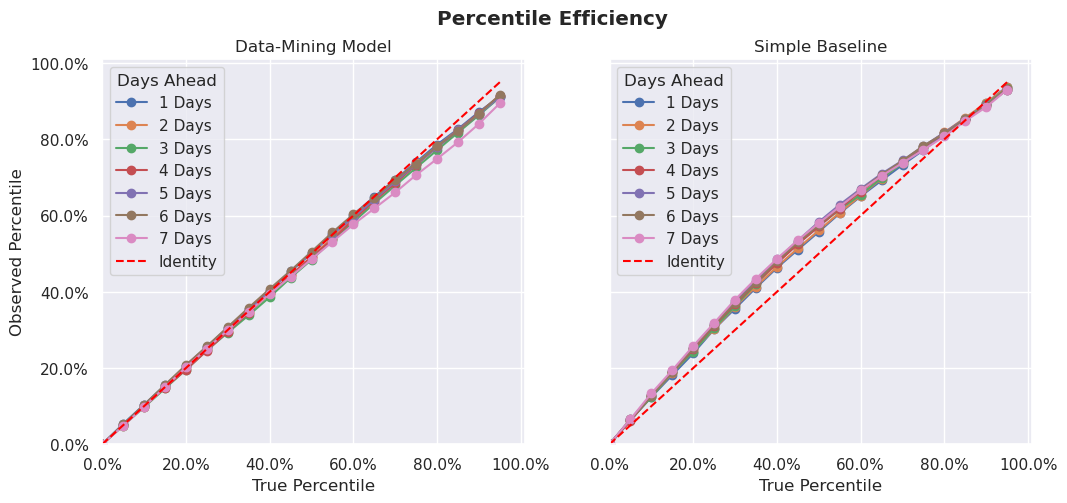

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

make_plot(df, "Data-Mining Model", axes[0])
make_plot(df_baseline, "Simple Baseline", axes[1])
axes[1].set_ylabel("")
plt.suptitle("Percentile Efficiency", fontweight="bold")
plt.savefig("../plots.percentile_efficiency.png", dpi=300)

In [79]:
np.abs(df_baseline_err) - np.abs(df_err)

,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.3,1.3,1.1,1.4,1.3,1.4
2,2.0,2.5,2.1,2.7,2.6,2.3,3.2
3,2.7,3.6,3.5,3.9,3.8,3.5,4.4
4,3.4,4.5,3.9,4.4,4.7,4.5,5.6
5,4.6,5.1,5.1,5.7,6.0,5.6,6.7
6,5.0,5.5,5.5,6.3,6.9,6.3,7.9
7,5.6,6.0,5.9,6.8,7.4,6.6,8.2
8,6.0,6.0,6.3,7.1,8.3,7.3,8.1
9,5.6,5.7,6.3,6.8,8.1,7.5,7.5
